## Project 2
A project by Stein Are Årsnes, Sanjai Vijeyaratnam og Lars Olav Thorbjørnsen

### Abstract
- In this project a logistic growth model is used to model a fish population in a lake. We incorporate a harvesting term in the logistic equation and examine how different harvesting rates affect population growth and sustainability. Both the euler and the fourth-order Runga-Kutta method is used to simulate the population over time. We find the Runga-Kutta method the most accurate at the different time steps. Maximum Sustainable Yield, equilibrium points and overfishing is looked at through simulations and mathematical analysis. The results show a fine balance required to avoid population collapse and the importance of quick action to prevent overfishing and population collapse. The project provides a good understanding of the modeling process, from formulating differential equations to interpreting the results. 
### Introduction
- A fish population is looked at to gain practical experience in modeling population dynamics using ordinary differential equations. We will focus on initial value problems where we know the initial population and on modeling future growth and decline of the population. We will be formatting equations, solving the equations and using simulations to explore population behavior. We will use the logistic growth model to describe how the growth rate of the population depends on its current size. 
- We will look at a fish population and how it changes due to natural growth and harvesting. In this project we will use the numerical methods Euler and the fourth-order Runga-Kutta(RK4), giving insight on advantages and limitations of each method. Simulations will be used to study the population under different scenarios, such as varying initial size and different harvest rate. Maximum Sustainable yield (MSY) is also looked into to understand the limits of harvesting before a population collapses, we will look into equilibrium points and population dynamics under overfishing conditions. 
### Exercise 1.0

Population models are crucial for understanding how populations change over time. Here are some key population dynamics models: 
1. Exponential growth model
   - Equation: $dN/dt = rN$
   - Exponential growth models is a model that does not increase or decrease at a steady rate. It grows proportional to its present size. So f.ex. it will always grow at a rate of 3 times its size or a percentage of its size. This model is often used in early stages of population establishment or where limits and resources are not a concern.[^1]
   - An example of Exponential growth can be bacteria culture which will increase exponential until essential resources are exhausted. 
2. Logistic growth model
   - Equation: $dN/dt = r(1-N/K)N$
   - In the logistic growth model the populations growth percentage will get smaller and smaller as the population size increases until it hits a maximum. This maximum is decided based on resources in the environment and is known as the carrying capacity, the K in the formula.[^1]
   - An example of logistic growth can be yeast, the population will grow until the limit of available nutrients is hit. 
3. Predator-Prey Models(Lotka-Volterra Models)
   - Equation: a system of two differential equations:
     - dx/dt = $\alpha x - \beta xy $ (prey)
     - dy/dt = $\sigma xy - \gamma y$ (predator)
   - The predator-prey model is used to describe the dynamic of a population where two species interact, one as prey and the other as predator. The x variable is the population density of prey and the y variable the predator.
   - The prey is assumed to have unlimited food and reproduce exponentially, represented in the equation as $\alpha x $. $\beta xy$ is the rate of which the prey is being preyed upon. 
   - The predators population growth rate is represented in the equation as $\sigma xy$. While $\gamma y$ stands for the loss rate of the predators, due to emigration or natural death. [^2]
   - An example of this model can be the relationship between rabbits (prey) and foxes (predators). If we assume the rabbits have unlimited food and reproduce exponentially, the population will grow fast. This will cause the population of the foxes to also increase as there is more food, which then again will decrease the population of rabbits and then again the population of foxes. 
4. Metapopulation 
   - Equation: $dN/dt = cN(1-N) - eN$
   - Consists of multiple populations of the same species that interact with each other. "it consists of a population of populations"[^3]. These models focus on populations that are divided into separate groups that occupy habitats. Local populations can go instinct, but migration between these habitats can recolonize empty habitats. [^4]
   - One example of this is with fish, the populations are normally separated but they overlap during breading times which allows for gene flow between populations.
5. Age-Structured Models (Leslie Matrix)
   - Equation: Uses matrices to represent population dynamics across different age groups. 
   - This model is used to model the changes in a population over a period of time. The population is divided into groups based on age. This matrix method can be used to predict the size and structure of next years population for populations with age structure. [^5]
   - Examples where this model is used is fisheries, wildlife management and human demography where survival and reproduction rates differ by age. 

### Exercise 1.1
- In the logistic growth model the term -aN or as I have written it N/K, represents the negative feedback mechanism as the population is closing in on the carrying capacity K. This decline in population growth can be due to many factors as: Limited resources, environmental constraints or self-regulation. 
- The purpose of modeling this decline is to realistically simulate real-world scenarios in the population. The population does not have unlimited growth due to constraints, which makes the logistic model more accurate for long term predictions. 

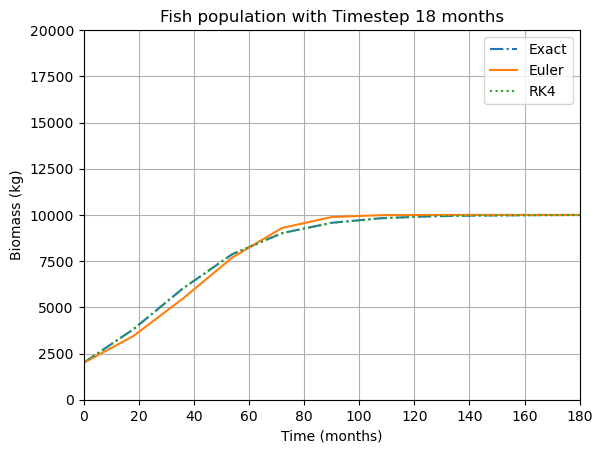

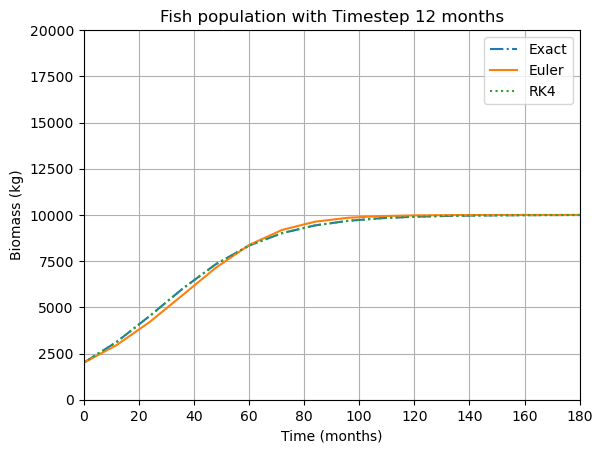

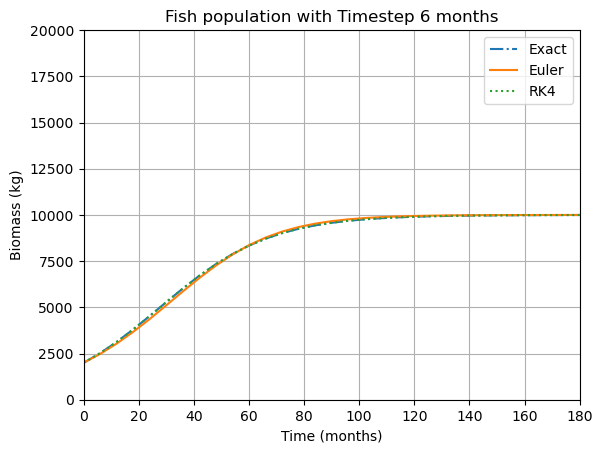

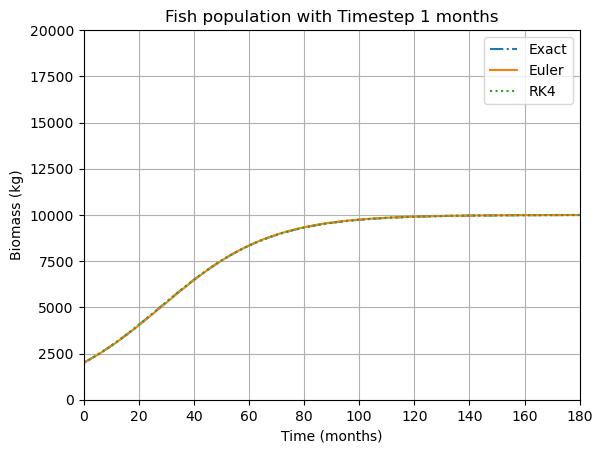

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


starttime = 0
endtime = 12*15

K = 10000
r = 0.6/12

N0= 2000


def exact_solution(t, N0, K, r):
    return N0*K/(N0+(K-N0)*math.exp(-r*t))

def euler_method(N0, r, K, timestep, starttime, endtime):
    t = starttime
    y = N0
    T = [t]
    Y = [y]
    while t < endtime:
        y = y + timestep*r*(1-y/K)*y
        t += timestep
        T.append(t)
        Y.append(y)
    return T, Y

def rk4_method(N0, r, K, timestep, starttime, endtime):
    t = starttime
    y = N0
    T = [t]
    Y = [y]
    while t < endtime:
        k1 = timestep*r*(1-y/K)*y 
        k2 = timestep*r*(1-(y + k1/2)/K)*(y + k1/2)
        k3 = timestep*r*(1-(y + k2/2)/K)*(y + k2/2)
        k4 = timestep*r*(1-(y + k3)/K)*(y + k3)
        y = y + (k1 + 2*k2 +2*k3 + k4)/6
        t+= timestep
        T.append(t)
        Y.append(y)
    return T,Y

def plot_results(T_exact, Y_Exact, T_Euler, Y_Euler, T_rk4, Y_rk4, timestep):
    plt.plot(T_exact, Y_Exact, label='Exact', linestyle='dashdot')
    plt.plot(T_Euler, Y_Euler, label=f'Euler (dt={timestep} months)')
    plt.plot(T_rk4, Y_rk4, label=f'RK4 (dt={timestep} months)', linestyle='dotted')
    plt.title(f'Fish population with Timestep {timestep} months')
    plt.xlabel('Time (months)')
    plt.ylabel('Biomass (kg)')
    plt.ylim(0, 20000)
    plt.xlim(0, endtime)
    plt.grid(True)
    plt.legend(['Exact', 'Euler', 'RK4'])
    plt.show()

timesteps = [18, 12, 6, 1]
for timestep in timesteps:
    T_exact = np.arange(starttime, endtime+timestep, timestep)
    Y_exact = [exact_solution(t, N0, K, r) for t in T_exact]

    T_euler, Y_euler = euler_method(N0, r, K, timestep, starttime, endtime)

    T_rk4, Y_rk4 = rk4_method(N0, r, K, timestep, starttime, endtime)

    plot_results(T_exact, Y_exact, T_euler, Y_euler, T_rk4, Y_rk4, timestep)


### Exercise 1.2 
- We see that with larger timesteps the Euler methods really deviated from the exact solution as the timestep increases. This is because with a larger timestep we skip over import detail in the curve of the logistic growth. 
- When we have smaller timesteps we see that both methods are closely equal to the exact solution. So for the Euler method a smaller timestep is recommended for the most accurate results. While the Runge kutta method works well with both small timesteps and larger timesteps. To conclude RK4 provides better accuracy than Euler, making it more reliable. 

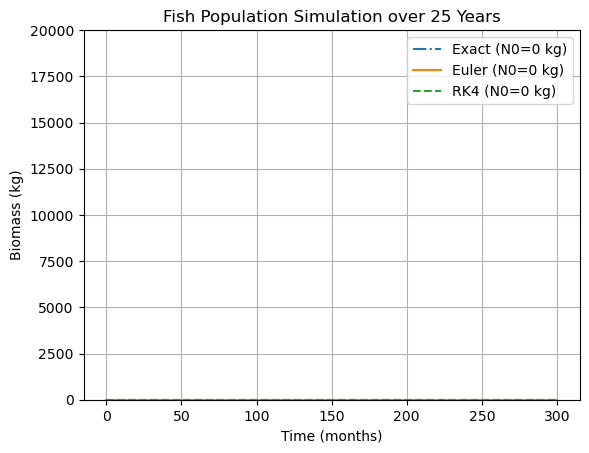

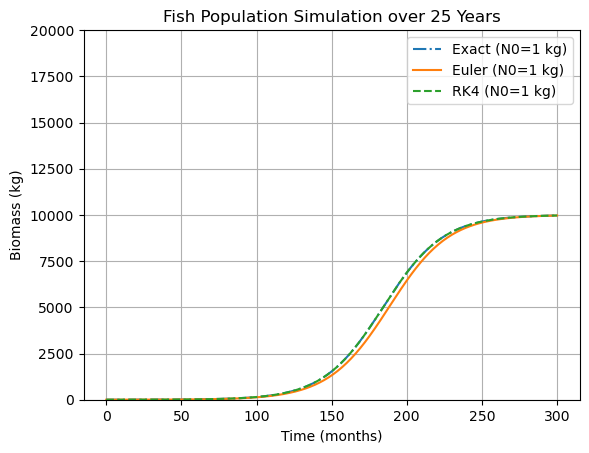

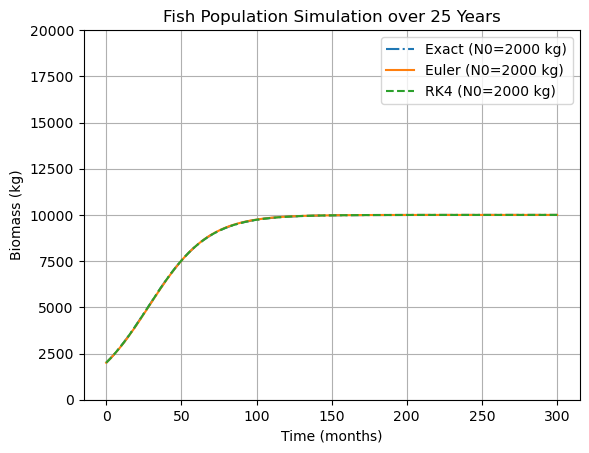

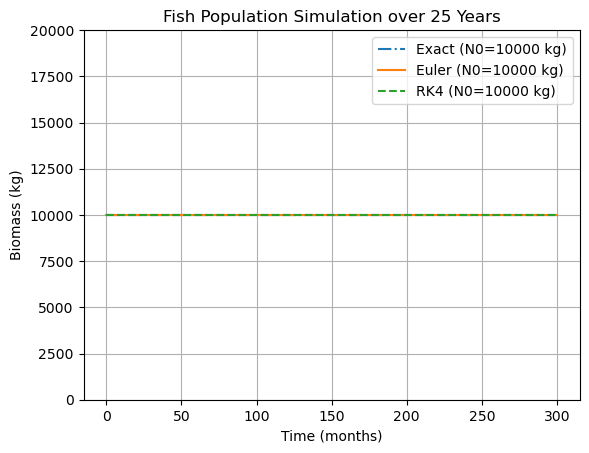

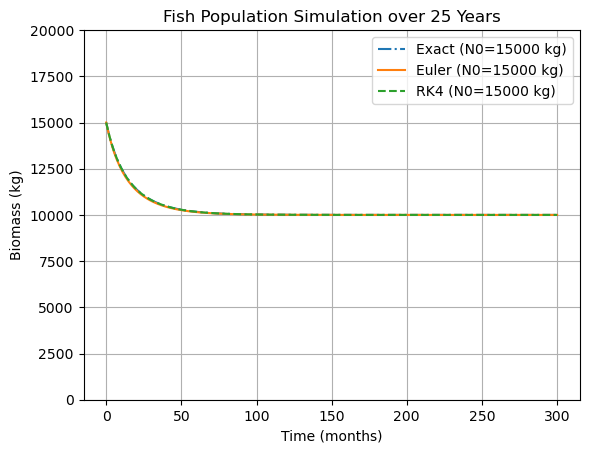

In [2]:
def simulate_population(N0_values, timestep, duration_years):
    for N0 in N0_values:
        T_exact = np.arange(starttime, endtime + timestep, timestep)
        Y_exact = [exact_solution(t, N0, K, r)for t in T_exact]

        T_euler, Y_euler = euler_method(N0, r, K, timestep, starttime, endtime)
        T_rk4, Y_rk4 = rk4_method(N0, r, K, timestep, starttime, endtime)

        plt.plot(T_exact, Y_exact, label=f'Exact (N0={N0} kg)', linestyle='dashdot')
        plt.plot(T_euler, Y_euler, label=f'Euler (N0={N0} kg)')
        plt.plot(T_rk4, Y_rk4, label=f'RK4 (N0={N0} kg)', linestyle='dashed')
        plt.title(f'Fish Population Simulation over {duration_years} Years')
        plt.xlabel('Time (months)')
        plt.ylabel('Biomass (kg)')
        plt.ylim(0, 20000)
        plt.grid(True)
        plt.legend()
        plt.show()

N0_values = [0, 1, 2000, 10000, 15000]
timestep = 1
duration_years = 25
endtime = 12*duration_years

simulate_population(N0_values, timestep, duration_years)


### Exercise 1.3
- For N0=0kg we see that the population will remain at zero since there is no initial biomass to grow from. 
- For N0=1kg the population grows very slowly before eventually starting to grow more rapidly and then again stabilizing near the carrying capacity K (10000kg). Here we see a small difference between the euler and the rk4 method. When the population starts growing more rapidly we see that the rk4 method has the steepest slope. 
- N0 = 2000kg starts lower than K, so the population grows rapidly towards K and eventually stabilizes at K. 
- N0 = 10000kg starts exactly at the carrying capacity, so the population remains constant. 
- For N0=15000kg the population initially starts above the carrying capacity so the population starts declining until stabilizing towards K.

<function matplotlib.pyplot.show(close=None, block=None)>

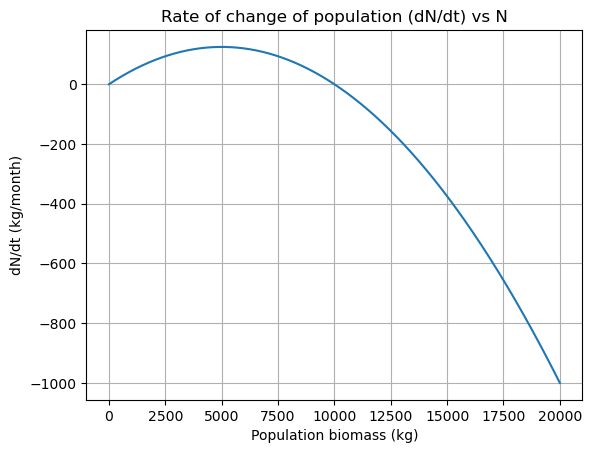

In [3]:
def dN_dt(N, r, K):
    return r*(1-N/K)*N

N_values = np.linspace(0, 20000, 1000)
dN_values = dN_dt(N_values, r, K)
plt.plot(N_values, dN_values)
plt.title('Rate of change of population (dN/dt) vs N')
plt.xlabel('Population biomass (kg)')
plt.ylabel('dN/dt (kg/month)')
plt.grid(True)
plt.show

### Exercise 1.4
- When N=0, dN/dt = 0, meaning no population growth, as expected. This is because the population starts at zero and will remain at zero since there are no individuals to reproduce. We have also seen this in previous simulations.
- When N=K, dN/dt = 0, meaning the population is at equilibrium, the carrying capacity. The population stabilizes at K which we have seen at almost all previous simulations, only exception is when N=0. 
- To find the population size N at which dN/dt is at max, we take the derivate of dN/dt with respect to N and set it to zero, then simplifying and solving for N.
$$\frac{d}{dN}(r(1- \frac{N}{K})N) = 0 $$
$$r(1-\frac{N}{K}) - r\frac{N}{K} = 0 $$
$$1- 2\frac{N}{K} = 0 $$
$$N = \frac{K}{2} $$
- The population growth is maximized when $N = \frac{K}{2} = 5000 kg$. This represents the point where the population grows at the fastest rate. 
- To find the max value for $\frac{dN}{dt}$ we have to substitute $ N = \frac{K}{2}$ into the equation for $\frac{dN}{dt}$
$$\frac{dN}{dt} = r(1- \frac{5000}{10000})5000 = \frac{rK}{4} $$
- given r = 0.05 per month and K = 10000:
$$= \frac{0.05 * 10000}{4} = 125kg/month $$
- This is the maximum rate at which the population grows and it happens when N = 5000kg. This we have also observed in previous simulations where the initial population starts below or around 5000kg. Around 5000kg we see that the graph is the most steep. 

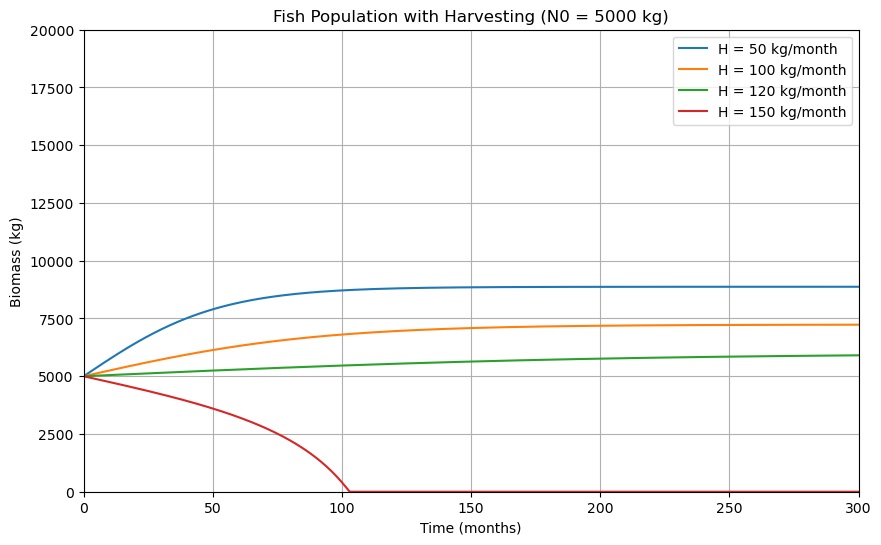

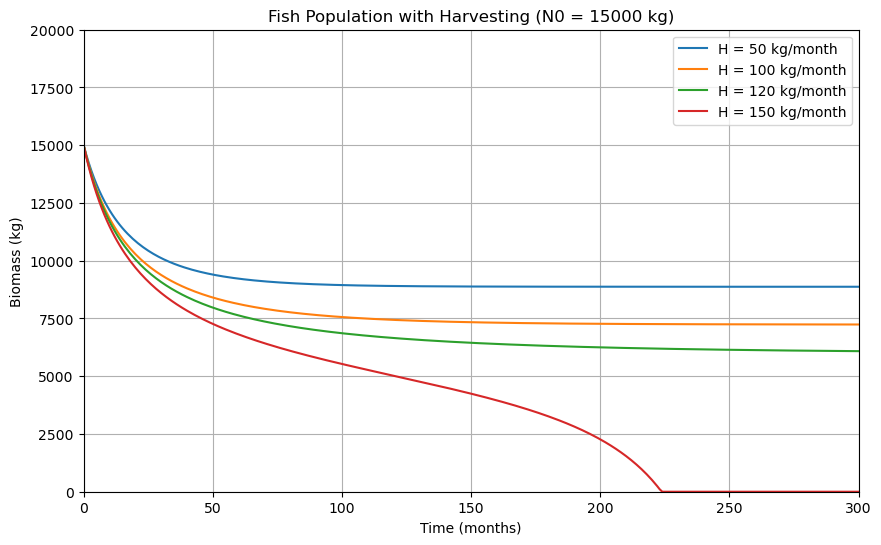

In [4]:
THarvest = []
YHarvest = []
def DHarvest(N, r, k, H):
    return r * (1 - N / k) * N - H

def HarvestKutta4(N0, k, r, timestep, endtime, H):
    THarvest = []
    YHarvest = []

    t = 0
    N = N0
    THarvest.append(t)
    YHarvest.append(N)

    while t < endtime:
        k1 = timestep * DHarvest(N, r, k, H)
        k2 = timestep * DHarvest(N + 0.5 * k1, r, k, H)
        k3 = timestep * DHarvest(N + 0.5 * k2, r, k, H)
        k4 = timestep * DHarvest(N + k3, r, k, H)

        N = N + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

        if N <= 0: 
            N = 0

        t += timestep
        THarvest.append(t)
        YHarvest.append(N)

    return THarvest, YHarvest

def plot_harvest_scenarios():
    harvest_rates = [50, 100, 120, 150]
    N0_values = [5000, 15000]

    for N0 in N0_values:
        plt.figure(figsize=(10, 6))
        for H in harvest_rates:
            THarvest, YHarvest = HarvestKutta4(N0, K, r, timestep, endtime, H)
            plt.plot(THarvest, YHarvest, label=f'H = {H} kg/month')
        
        plt.title(f'Fish Population with Harvesting (N0 = {N0} kg)')
        plt.xlabel('Time (months)')
        plt.ylabel('Biomass (kg)')
        plt.ylim(0, 20000)
        plt.xlim(0, endtime)
        plt.grid(True)
        plt.legend()
        plt.show()

plot_harvest_scenarios()


### Exercise 1.5
- Case 1: N0 = 5000kg 
  - Low Harvesting rate(H= 50kg/month): We see that the population grows at a moderate rate and stabilizes at a new equilibrium, lower than the original carrying capacity K because of the constant removal of fish. 
  - Moderate Harvesting rate(H=100kg/month): Population still increases but more slowly, until it hits a new equilibrium and stabilizes. 
  - High harvesting rate(H=120/150 kg/month): At 120kg/month the population barely grows before entering a new equilibrium and stabilizes. With harvesting at 150kg/month the population in declining before collapsing and going to zero. 

- Case 2: N0 = 15000kg
  - Low Harvesting rate(H=50kg/month): The population decreases before eventually stabilizing at a new equilibrium lower than the carrying capacity.
  - Moderate harvesting rate (H=100kg/month): The population decreases at a faster rate before stabilizing at a new equilibrium below K. 
  - High harvesting rate(H=120/150 kg/month): At 120kg/month the decline is even faster but again will stabilize at a level lower than K and also lower than the other two harvesting rates. When harvesting is at 150kg/month the population decreases at a fast pace before decreasing a bit slower again and then collapsing and reaching zero in the end. 

- Low harvesting rates allow the population to maintain itself, but will stabilize lower than the carrying capacity. High rates (Higher than 120kg/month) will lead to population collapse, which demonstrates that there is a threshold for harvesting. 
- A larger initial population size delays the eventual collapse when using high rates but it does not prevent it. 

### Exercise 1.6
- To determine the Maximum Sustainable Yield (MSY), we need to calculate the critical limit at which the fish population can sustain the maximum harvest rate without collapsing. This is when the population is at an equilibrium point and the harvesting rate matches the population growth at its maximum. We know the that the population growth is maximized when the population is half the carrying capacity $N = \frac{K}{2}$. This gives the population growth rate: $ \frac{rK}{4}$
- The maximum sustainable yield occurs when the harvesting rate is equal to the maximum population growth rate: $ \frac{rK}{4}$. Lets calculate MSY.
$$H_{MSY} =  \frac{rK}{4} = \frac{(\frac{0.6}{12})*10000}{4} = \frac{500}{4} = 125kg/month $$
- This means that if we harvest fish at a rate of 125kg/month the population can sustain itself without collapsing. 

### Exercise 1.7
- To find the two points of equilibrium when the harvesting rate H is less than the MSY, we start with the modified logistic growth equation with harvesting. Since the population remains constant at equilibrium we set $\frac{dN}{dt} = 0$ we now get:
$$r(1- \frac{N}{K})N - H = 0 $$
And solve for N
$$rN(1-\frac{N}{K}) = H $$
$$rN - \frac{rN^2}{K} = H $$
$$\frac{r}{K}N^2 - rN + H = 0 $$
$$N^2 - KN + \frac{KH}{r} = 0 $$
$$N = -(-K) \pm \sqrt{\frac{(-K)^2 - 4(1)(\frac{KH}{r})}{2(1)} } $$
- The two equilibrium points are:
$$N_1 = \frac{K + \sqrt{K^2 - \frac{4KH}{r}}}{2} $$
$$N_2 = \frac{K - \sqrt{K^2 - \frac{4KH}{r}}}{2} $$
- To determine the stability of these equilibrium points we look at the signs around the points. 
  - N1(Larger equilibrium): This is a stable equilibrium point, if N is slightly changed to above or below this point, the population will return to this equilibrium over time. 
  - N2(smaller equilibrium): This is an unstable equilibrium point. If N is changed to above the point the population will grow towards N1. If N is changed to below this point the population will collapse to zero
- The reason for these behaviors is that the larger equilibrium is a point where population growth and harvesting balance each other, while the smaller one is a point where the population cannot sustain itself under the current harvesting pressure. 
- As H increases the equilibrium points move closer together. When H reaches MSY, the two points will coincide. If H is larger than MSY the discriminant in the formula will become negative, meaning no real equilibrium points and the population will collapse. 
- The initial population N0 is important, if N0 is greater than N2 the population will grow toward N1. If N0 is less than N2 the population will collapse to zero.

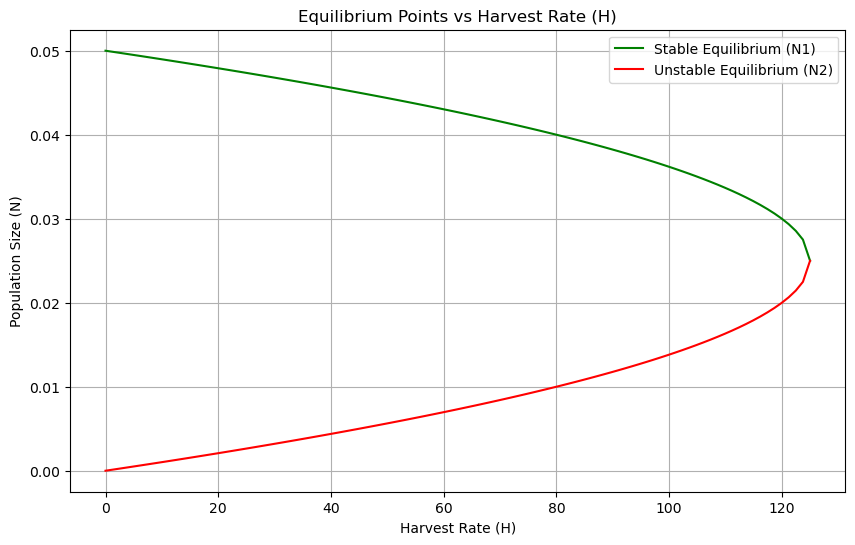

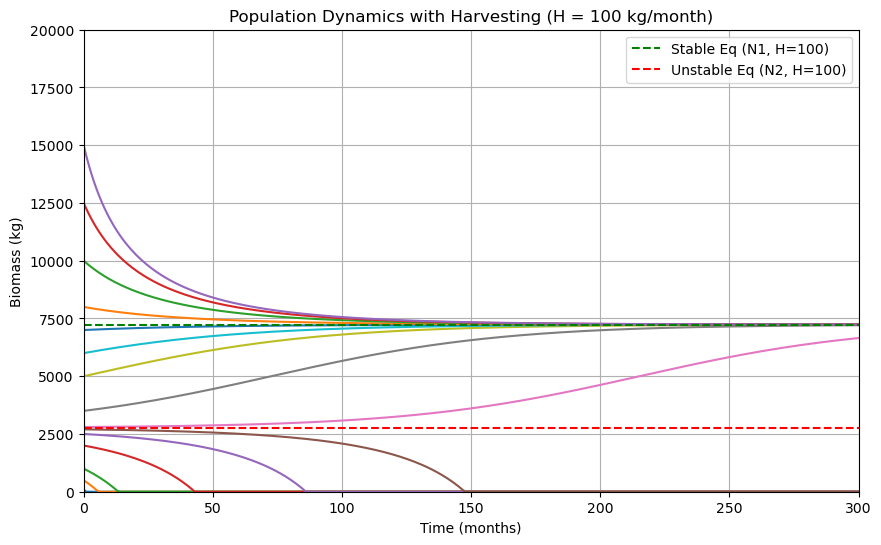

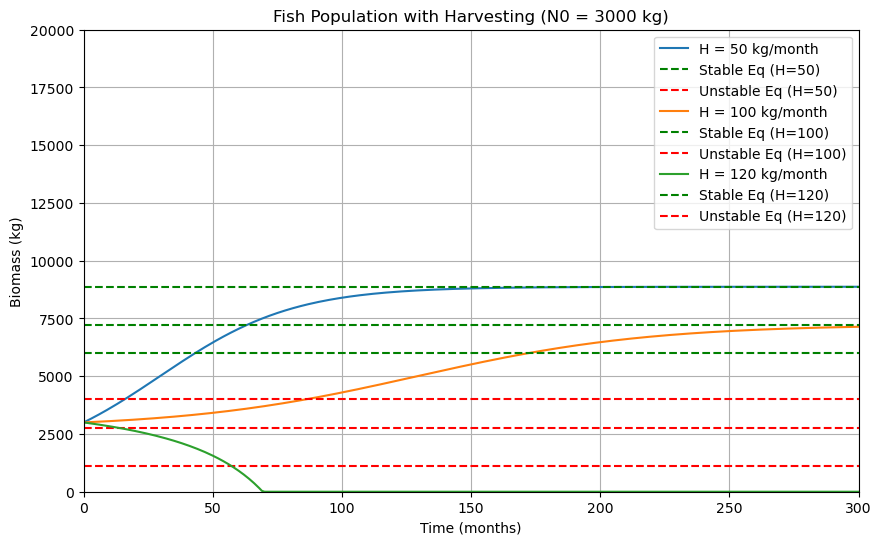

In [5]:
def equilibrium_points(K, r, H):
    discriminant = K**2 - (4*K*H)/r
    if discriminant >= 0:
        N1 = (K + np.sqrt(discriminant)) / 2
        N2 = (K - np.sqrt(discriminant)) / 2
        return N1, N2
    else:
        return None, None
    
def plot_equilibrium_vs_H(K, r):
    N1_values = []
    N2_values = []
    H_values =  np.linspace(0, r*K/4, 100)
    for H in H_values:
        N1, N2 = equilibrium_points(r, K, H)
        if N1 is not None and N2 is not None:
            N1_values.append(N1)
            N2_values.append(N2)
        else:
            N1_values.append(np.nan)
            N2_values.append(np.nan)

    plt.figure(figsize=(10, 6))
    plt.plot(H_values, N1_values, label='Stable Equilibrium (N1)', color='g')
    plt.plot(H_values, N2_values, label='Unstable Equilibrium (N2)', color='r')
    plt.title('Equilibrium Points vs Harvest Rate (H)')
    plt.xlabel('Harvest Rate (H)')
    plt.ylabel('Population Size (N)')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_population_dynamics(k, r, timestep, endtime):
    H = 100  # Set the harvesting rate
    N0_values = [100, 500, 1000, 2000, 2500, 2700, 2800, 3500, 5000, 6000, 7000, 8000, 10000, 12500, 15000]

    plt.figure(figsize=(10, 6))

    for N0 in N0_values:
        THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
        plt.plot(THarvest, YHarvest)

    N1, N2 = equilibrium_points(k, r, H)
    if N1 is not None and N2 is not None:
        plt.axhline(y=N1, color='g', linestyle='--', label=f'Stable Eq (N1, H={H})')
        plt.axhline(y=N2, color='r', linestyle='--', label=f'Unstable Eq (N2, H={H})')

    plt.title('Population Dynamics with Harvesting (H = 100 kg/month)')
    plt.xlabel('Time (months)')
    plt.ylabel('Biomass (kg)')
    plt.ylim(0, 20000)
    plt.xlim(0, endtime)
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_harvest_scenarios(k, r, timestep, endtime):
    harvest_rates = [50, 100, 120]
    N0_values = [3000]

    for N0 in N0_values:
        plt.figure(figsize=(10, 6))
        for H in harvest_rates:
            THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
            plt.plot(THarvest, YHarvest, label=f'H = {H} kg/month')

            N1, N2 = equilibrium_points(k, r, H)

            if N1 is not None and N2 is not None:
                plt.axhline(y=N1, color='g', linestyle='--', label=f'Stable Eq (H={H})')
                plt.axhline(y=N2, color='r', linestyle='--', label=f'Unstable Eq (H={H})')

        plt.title(f'Fish Population with Harvesting (N0 = {N0} kg)')
        plt.xlabel('Time (months)')
        plt.ylabel('Biomass (kg)')
        plt.ylim(0, 20000)
        plt.xlim(0, endtime)
        plt.grid(True)
        plt.legend()
        plt.show()

plot_equilibrium_vs_H(K,r)
plot_population_dynamics(K, r, timestep, endtime)

plot_harvest_scenarios(K, r, timestep, endtime)


- The first graph confirms our explanation of how the equilibrium points behave when H is varying. 
  - At H=0 the stable equilibrium is N1=K, the population reaches its carrying capacity when there is no harvesting. The unstable equilibrium N2 = 0, because without any harvesting a population that starts at zero will remain at zero.
  - We see that when H increases the stable N1 equilibrium decreases, meaning higher harvesting rates reduce the maximum population the lake can sustain. The unstable equilibrium increases, making the population more vulnerable to collapse if it drops below its threshold. 
  - When H reaches MSY we see that the points meet at a single point, where the population is very sensitive to change. If harvesting exceeds this level the population will collapse.
- At the second graph we see how the population behave with different initial population (N0). 
  - For N0 values bigger than N1 the population declines but stabilizes at N1
  - For N0 between N1 and N2 the population grows and stabilizes at N1, but is more vulnerable to collapse, especially if N0 falls below N2.
  - For N0 values smaller than N2 we see that the population collapses.
  - So N0 is important for determining if a population will survive or collapse.
- The third graph shows another visualization of how the harvest rate affects the equilibrium points. The different harvest rates shown, is set at 50, 100 and 120 kg/month, and the initial start value of the population is set to 3000. This is to display that for the situations with 50 and 100 kg/month set as harvest rate, the population will reach their stable equilibrium points and stabilize, where as for the harvest rate of 120 kg/month, the initial start value of the population is under the unstable equilibrium, meaning that the harvest rate is to large, and the fish population will continue to decline. 

### Exercise 1.8

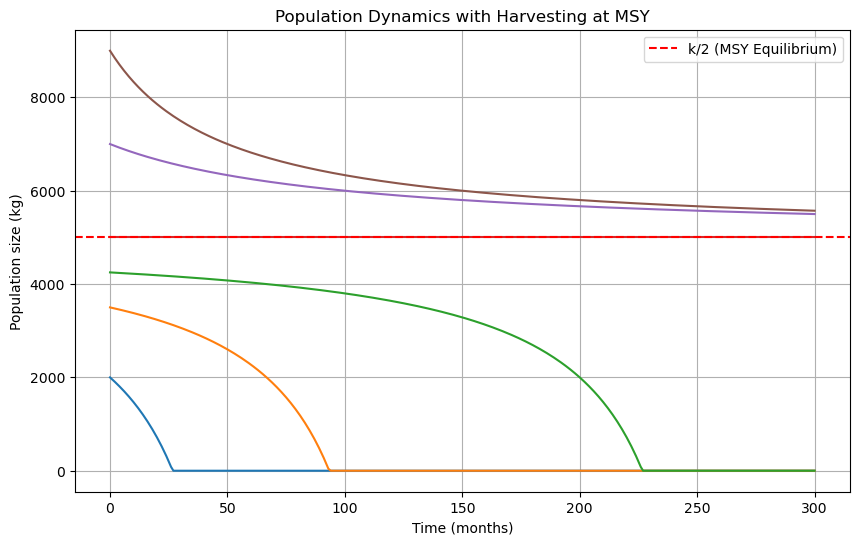

In [6]:
H_MSY = r * K / 4  #MSY

initial_populations = [2000, 3500, 4250, 5000, 7000, 9000]
plt.figure(figsize=(10,6))  # Different initial populations
for N0 in initial_populations:
    T_harvest, Y_harvest = HarvestKutta4(N0, K, r, timestep, endtime, H_MSY)
    plt.plot(T_harvest, Y_harvest)

# Plot results
plt.axhline(K / 2, color='red', linestyle='--', label='k/2 (MSY Equilibrium)')
plt.title('Population Dynamics with Harvesting at MSY')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

- Using simulations we see that the initial population has to be higher or equal to the MSY equilibrium for the population to not collapse. 
- This simulation tells us that harvesting at the MSY when the population is too low, will most likely lead to the population's collapse. In general, harvesting at the MSY could be quite risky, as it needs extremely accurate knowledge and control of the population size. So even though it leads to the most yield, it is more safe to harvest below the MSY to ensure sustainability. 

### Exercise 1.9

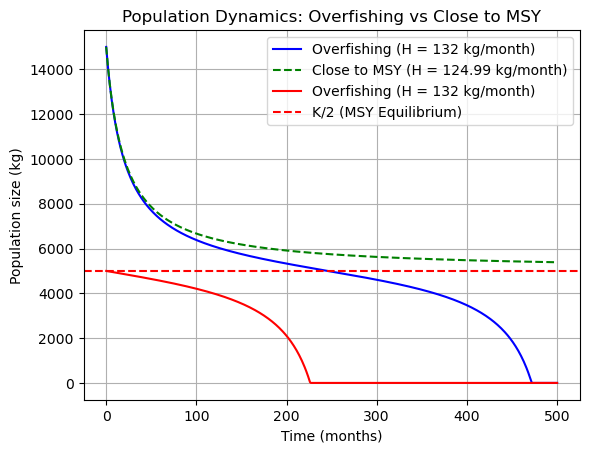

In [7]:
H_overfishing = 132
H_close_to_MSY = 124.99
initial_population = 15000
initial_population2 = 5000
endtime = 500
T_overfishing, Y_overfishing = HarvestKutta4(initial_population, K, r, timestep, endtime, H_overfishing)
T_overfishing2, Y_overfishing2 = HarvestKutta4(initial_population2, K, r, timestep, endtime, H_overfishing)
T_close_to_MSY, Y_close_to_MSY = HarvestKutta4(initial_population, K, r, timestep, endtime, H_close_to_MSY)

plt.plot(T_overfishing, Y_overfishing, label=f'Overfishing (H = {H_overfishing} kg/month)', color='blue')
plt.plot(T_close_to_MSY, Y_close_to_MSY, label=f'Close to MSY (H = {H_close_to_MSY} kg/month)', linestyle='--', color='green')
plt.plot(T_overfishing2, Y_overfishing2, label=f'Overfishing (H = {H_overfishing} kg/month)', color='red')
plt.axhline(K / 2, color='red', linestyle='--', label='K/2 (MSY Equilibrium)')
plt.title('Population Dynamics: Overfishing vs Close to MSY')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

- The graph shows us that fishing at a high rate will lead to a dramatic decrease in population before it will eventually stabilize at equilibrium. We see that there is not too much that differs between overfishing and fishing close to MSY at the beginning, but when one starts to stabilize to other continues to fall. This gives a false population trajectory which can give a false impression that the system is sustainable. When the graph that represents overfishing goes below equilibrium we see that the decline again starts to intensify and soon collapses. We see very well how dN/dt changes trough time on how steep the graph is. 
- If we simulate with different initial conditions, we would observe that populations closer to the unstable equilibrium point collapse much faster. Populations starting with higher biomass will take longer to collapse but are not immune to overfishing.
- As the population approaches collapse, its ability to recover diminishes. The lower the population the less resilient it becomes to natural change and harvesting. If the population drops below the unstable equilibrium, recovery is almost impossible without stopping harvesting entirely. This is why it is important to act fast to prevent collapse.
- Harvesting at the MSY will not lead to extinction, but as we can see on this graph and on earlier task, it is extremely risky and for long term sustainability, it is better to harvest at a slower rate well below the MSY.
- A known example of overfishing is the collapse of the northern Atlantic cod fishery in the 1990s. Overfishing in 1980s and early 1990s led to a sudden population collapse. Despite drastic measures, including a fishing moratorium, the cod population has struggled to recover even decades later. Today the cod populations still remain at low levels with only a few showing signs of slow recovery. [^6]

### Exercise 1.10


TypeError: '>' not supported between instances of 'float' and 'NoneType'

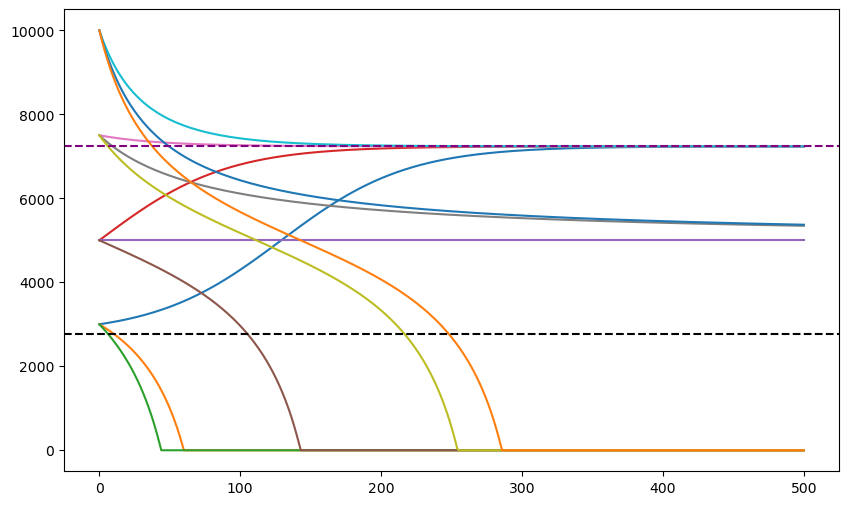

In [8]:
def recovery_time(N0, k, r, timestep, endtime, H, recovery_threshold=0.6):
    THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
    for i, N in enumerate(YHarvest):
        if N >= recovery_threshold * k:
            return THarvest[i]
    return endtime

def plot_recovery_scenarios(k, r, timestep, endtime):
    harvest_rates = [100, 125, 140]
    N0_values = [3000, 5000, 7500, 10000]

    plt.figure(figsize=(10, 6))

    for N0 in N0_values:
        for H in harvest_rates:
            THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
            plt.plot(THarvest, YHarvest, label=f'N0 = {N0} kg, H = {H} kg/month')

    N1, N2 = equilibrium_points(k, r, 100)
    N3, N4 = equilibrium_points(k, r, 125)
    plt.axhline(y=N1, color='purple', linestyle='--', label='Stable Eq (N1, H=100)')
    plt.axhline(y=N2, color='black', linestyle='--', label='Unstable Eq (N2, H=100)')
    plt.axhline(y=N3, color='green', linestyle='--', label='Stable Eq (N1, H=125)')
    #plt.axhline(y=N4, color='red', linestyle='--', label='Unstable Eq (N2, H=125)')
    plt.title('Fish Population Dynamics with Reduced Harvest Rates')
    plt.xlabel('Time (months)')
    plt.ylabel('Biomass (kg)')
    plt.ylim(0, k)
    plt.xlim(0, endtime)
    plt.grid(True)
    plt.legend()
    plt.show()

def evaluate_recovery_times(k, r, timestep, endtime):
    harvest_rates = [100, 125, 140]
    N0_values = [3000, 5000, 7500, 10000]

    for N0 in N0_values:
        print(f"\nInitial Population: {N0} kg")
        for H in harvest_rates:
            time_to_recover = recovery_time(N0, k, r, timestep, endtime, H)
            print(f"  Harvest Rate = {H} kg/month: Recovery Time = {time_to_recover:.2f} months")

plot_recovery_scenarios(K, r, timestep, endtime)
evaluate_recovery_times(K, r, timestep, endtime)

In [ ]:
starttime = 0
endtime = 12*15

K = 10000
r = 0.6/12

N0_1= 5000
N0_2= 7500 
N0_3= 10000  

H_overfishing = 140  

H_MSY = 125  

H_reduced = 100 


T_overfishing, Y_overfishing = HarvestKutta4(N0_1, K, r, timestep, endtime, H_overfishing)
T_MSY, Y_MSY = HarvestKutta4(N0_1, K, r, timestep, endtime, H_MSY)
T_reduced, Y_reduced = HarvestKutta4(N0_1, K, r, timestep, endtime, H_reduced)

plt.plot(T_overfishing, Y_overfishing, label=f'Overfishing (H = {H_overfishing} kg/month)')
plt.plot(T_MSY, Y_MSY, label=f'At MSY (H = {H_MSY} kg/month)')
plt.plot(T_reduced, Y_reduced, label=f'Reduced Harvest (H = {H_reduced} kg/month)', linestyle='--')

plt.axhline(K, color='red', linestyle='--', label='K (Carrying Capacity)')
plt.title('Population Dynamics with Different Harvest Rates')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

T_overfishing_2, Y_overfishing_2 = HarvestKutta4(N0_2, K, r, timestep, endtime, H_overfishing)
T_MSY_2, Y_MSY_2 = HarvestKutta4(N0_2, K, r, timestep, endtime, H_MSY)
T_reduced_2, Y_reduced_2 = HarvestKutta4(N0_2, K, r, timestep, endtime, H_reduced)

plt.plot(T_overfishing_2, Y_overfishing_2, label=f'Overfishing (H = {H_overfishing} kg/month)')
plt.plot(T_MSY_2, Y_MSY_2, label=f'At MSY (H = {H_MSY} kg/month)')
plt.plot(T_reduced_2, Y_reduced_2, label=f'Reduced Harvest (H = {H_reduced} kg/month)', linestyle='--')

plt.axhline(K, color='red', linestyle='--', label='K (Carrying Capacity)')
plt.title('Population Dynamics with Different Harvest Rates')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

T_overfishing_3, Y_overfishing_3 = HarvestKutta4(N0_3, K, r, timestep, endtime, H_overfishing)
T_MSY_3, Y_MSY_3 = HarvestKutta4(N0_3, K, r, timestep, endtime, H_MSY)
T_reduced_3, Y_reduced_3 = HarvestKutta4(N0_3, K, r, timestep, endtime, H_reduced)

plt.plot(T_overfishing_3, Y_overfishing_3, label=f'Overfishing (H = {H_overfishing} kg/month)')
plt.plot(T_MSY_3, Y_MSY_3, label=f'At MSY (H = {H_MSY} kg/month)')
plt.plot(T_reduced_3, Y_reduced_3, label=f'Reduced Harvest (H = {H_reduced} kg/month)', linestyle='--')

plt.axhline(K, color='red', linestyle='--', label='K (Carrying Capacity)')
plt.title('Population Dynamics with Different Harvest Rates')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

[^1]: https://www.khanacademy.org, https://www.khanacademy.org/science/ap-biology/ecology-ap/population-ecology-ap/a/exponential-logistic-growth 


[^2]: Sandeep Kumar C H, "Lotka-Volterra Model", https://sail.usc.edu, 02.10.2024, https://sail.usc.edu/~lgoldste/ArtPhon/Slides/lotka-volterramodel.pdf 

[^3]:https://en.wikipedia.org, https://en.wikipedia.org/wiki/Metapopulation 

[^4]:https://www.cnr.berkeley.edu,  https://www.cnr.berkeley.edu/beislab/rail/html/rail_metapopulation_ecology.html

[^5]:https://bio.libretexts.org, https://bio.libretexts.org/Courses/Gettysburg_College/02%3A_Principles_of_Ecology_-_Gettysburg_College_ES_211/07%3A_A_Quantitative_Approach_to_Population_Ecology/7.03%3A_Leslie_Matrix_Models

[^6]:https://www.seachoice.org,  https://www.seachoice.org/info-centre/fisheries/overfishing/